In [1]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

Segmentation Models: using `keras` framework.


In [2]:
backbone = 'resnet34'
preprocess_input = sm.get_preprocessing(backbone)

In [3]:
length = 256
height = 256

In [4]:
train_images = []

In [5]:
for directory_path in glob.glob("C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/5_wt_%_100"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (length, height))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)

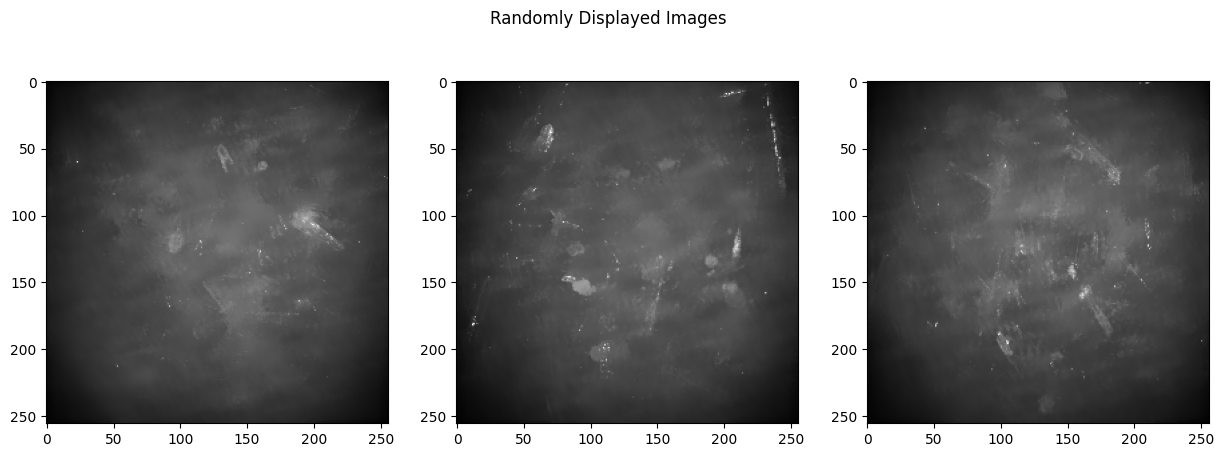

In [6]:
import random

random_images_indices = random.sample(range(len(train_images)), 3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, idx in enumerate(random_images_indices):
    axes[i].imshow(cv2.cvtColor(train_images[idx], cv2.COLOR_BGR2RGB))
    axes[i].axis('on')

plt.suptitle("Randomly Displayed Images")
plt.show()

In [7]:
train_images = np.array(train_images)
print(train_images.shape)

(10, 256, 256, 3)


In [8]:
train_masks = [] 

In [9]:
for directory_path in glob.glob("C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/5_wt_%_100/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) 
        mask = cv2.resize(mask, (length, height))
        train_masks.append(mask)

In [10]:
train_masks = np.array(train_masks)

In [11]:
X = train_images
Y = train_masks

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [14]:
model = sm.Unet(backbone, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [15]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

In [16]:
history=model.fit(x_train, 
          y_train,
          batch_size=32, 
          epochs=200,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: -1.4555 - acc: 0.1428 - val_loss: -8.6921 - val_acc: 0.0031
Epoch 2/200
1/1 [==============================] - 0s 90ms/step - loss: -7.5391 - acc: 0.2636 - val_loss: -9.4237 - val_acc: 0.0024
Epoch 3/200
1/1 [==============================] - 0s 88ms/step - loss: -11.1638 - acc: 0.3440 - val_loss: -12.8979 - val_acc: 1.9836e-04
Epoch 4/200
1/1 [==============================] - 0s 89ms/step - loss: -13.1949 - acc: 0.4715 - val_loss: -17.4259 - val_acc: 5.3406e-05
Epoch 5/200
1/1 [==============================] - 0s 90ms/step - loss: -17.7714 - acc: 0.6088 - val_loss: -16.3586 - val_acc: 2.2888e-05
Epoch 6/200
1/1 [==============================] - 0s 91ms/step - loss: -23.6496 - acc: 0.6164 - val_loss: -15.1947 - val_acc: 7.6294e-06
Epoch 7/200
1/1 [==============================] - 0s 90ms/step - loss: -26.4324 - acc: 0.6293 - val_loss: -14.5390 - val_acc: 7.6294e-06
Epoch 8/200
1/1 [==============================]

In [17]:
model.evaluate(np.array(x_val),np.array(y_val))

1/1 [==============================] - 0s 28ms/step - loss: -10.0385 - acc: 0.9837


[-10.038468360900879, 0.9836578369140625]

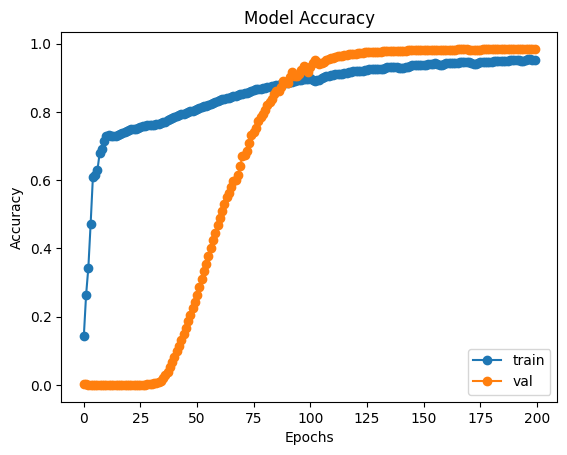

In [18]:
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

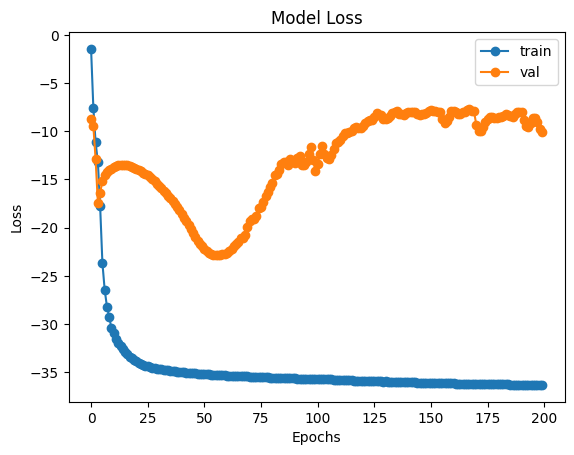

In [19]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [20]:
model.save('crystal_net.h5')

In [21]:
from tensorflow import keras
model = keras.models.load_model('crystal_net.h5', compile=False)

In [22]:
test_img = cv2.imread('C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/1_wt_%_100/aug_img/aug_0_356.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (length, height))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

In [23]:
mask_img = cv2.imread('C:/Users/JohnC/Desktop/Molecule_Datasets/Bilateral_Filtered_Dataset/EasyViewer_100/Wollastonite/1_wt_%_100/masks/aug_0_356_mask.png', cv2.IMREAD_GRAYSCALE)       
mask_img = cv2.resize(mask_img, (length, height))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_RGB2BGR)

In [24]:
prediction = model.predict(test_img)
prediction_image = prediction.reshape(mask.shape)

1/1 [==============================] - 1s 596ms/step


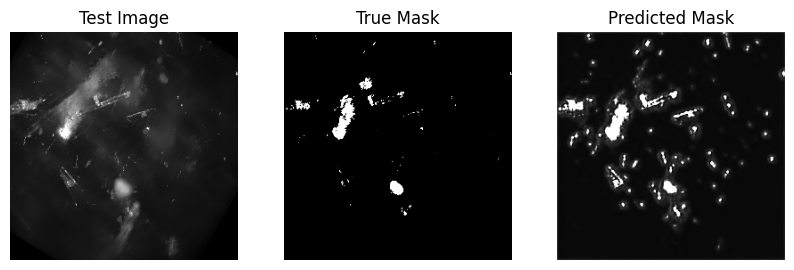

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Display Test Image
axes[0].imshow(cv2.cvtColor(test_img.squeeze(), cv2.COLOR_BGR2RGB))
axes[0].set_title('Test Image')
axes[0].axis('off')

# Display True Mask
axes[1].imshow(mask_img, cmap='gray')
axes[1].set_title('True Mask')
axes[1].axis('off')

# Display Predicted Mask
axes[2].imshow(prediction_image, cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.show()